In [1]:
import json
import requests
import os
import urllib
import numpy as np
from bs4 import BeautifulSoup
import pandas as pd
from csv_functions import *

In [2]:
circuits = circuit_csv()
constructor_results = constructor_results_csv()
constructor_standings = constructor_standings_csv()
constructors = constructors_csv()
driver_standings = driver_standings_csv()
drivers = drivers_csv()
lap_times = lap_times_csv()
qualifying = qualifying_csv()
races = races_csv()
results = results_csv()
seasons = seasons_csv()
status = status_csv()
    

year
1996    AxesSubplot(0.125,0.125;0.775x0.755)
1997    AxesSubplot(0.125,0.125;0.775x0.755)
1998    AxesSubplot(0.125,0.125;0.775x0.755)
1999    AxesSubplot(0.125,0.125;0.775x0.755)
2000    AxesSubplot(0.125,0.125;0.775x0.755)
2001    AxesSubplot(0.125,0.125;0.775x0.755)
2002    AxesSubplot(0.125,0.125;0.775x0.755)
2003    AxesSubplot(0.125,0.125;0.775x0.755)
2004    AxesSubplot(0.125,0.125;0.775x0.755)
2005    AxesSubplot(0.125,0.125;0.775x0.755)
2006    AxesSubplot(0.125,0.125;0.775x0.755)
2007    AxesSubplot(0.125,0.125;0.775x0.755)
2008    AxesSubplot(0.125,0.125;0.775x0.755)
2009    AxesSubplot(0.125,0.125;0.775x0.755)
2010    AxesSubplot(0.125,0.125;0.775x0.755)
2011    AxesSubplot(0.125,0.125;0.775x0.755)
2012    AxesSubplot(0.125,0.125;0.775x0.755)
2013    AxesSubplot(0.125,0.125;0.775x0.755)
2014    AxesSubplot(0.125,0.125;0.775x0.755)
2015    AxesSubplot(0.125,0.125;0.775x0.755)
2016    AxesSubplot(0.125,0.125;0.775x0.755)
2017    AxesSubplot(0.125,0.125;0.775x0.755)
2018 

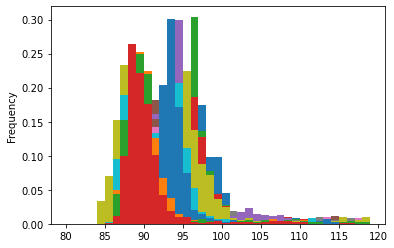

In [65]:
laps_by_track = lap_times.merge(races, left_on='raceId', right_on='raceId').merge(circuits, left_on='circuitId', right_on='circuitId')
laps_by_track.query('country == "Australia"').groupby('year')['time_seconds'].plot.hist(bins=range(80,120),density=True)

<AxesSubplot:>

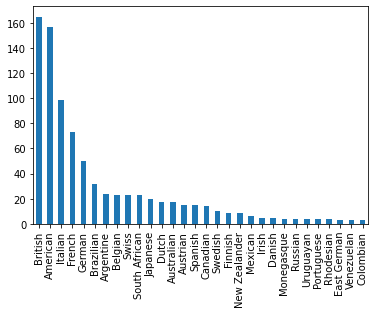

In [20]:
drivers['nationality'].value_counts()[:30].plot.bar()

In [66]:
x = races.loc[races['circuitId']==1].sort_values('year')['raceId'].values
y = lap_times[lap_times['raceId'].isin(x)].groupby('raceId')
y.first()['time'][1]

'1'

In [45]:
def driver_id_by_driver(driver_name):
    forename, surname=driver_name.split(' ')
    return drivers.loc[(drivers['surname']==surname) & (drivers['forename']==forename)]['driverId'].values[0]

def results_by_driver(driver_name):
    driver_id = driver_id_by_driver(driver_name)
    return results.loc[results['driverId']==driver_id]
    
#drivers.loc[(drivers['surname']=='Hamilton') & (drivers['forename']=='Lewis')].merge(lap_times,how='inner',on='driverId')

In [46]:
results_by_driver('Lewis Hamilton')

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
26,27,19,1,1,22,9,5,5,5,4.0,56,+46.548,5525103,53,3,1:35.462,209.033,1
56,57,20,1,1,22,3,13,13,13,0.0,56,\N,\N,25,19,1:35.520,203.969,11
68,69,21,1,1,22,5,3,3,3,6.0,66,+4.187,5903238,20,3,1:22.017,204.323,1
89,90,22,1,1,22,3,2,2,2,8.0,58,+3.779,5213230,31,2,1:26.529,222.085,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25301,25307,1070,1,131,44,2,2,2,2,18.0,71,+16.555,5935641,66,4,1:19.820,194.116,1
25320,25326,1071,1,131,44,10,1,1,1,25.0,71,1:32:22.851,5542851,46,2,1:11.982,215.503,1
25340,25346,1051,1,131,44,1,1,1,1,25.0,57,1:24:28.471,5068471,50,2,1:25.084,227.633,1
25360,25366,1072,1,131,44,1,1,1,1,26.0,50,2:06:15.118,7575118,47,1,1:30.734,244.962,1
